In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder

In [2]:
os.chdir(r"C:\Users\Sathish G\Churn-Prediction")

In [3]:
df = pd.read_csv("artifacts/customer_churn.csv")

In [19]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [20]:
df.tail().T

,7038,7039,7040,7041,7042
customerID,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,1,0
Partner,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,No,No
tenure,24,72,11,4,66
PhoneService,Yes,Yes,No,Yes,Yes
MultipleLines,Yes,Yes,No phone service,Yes,No
InternetService,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,Yes,No,Yes,No,Yes


In [21]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

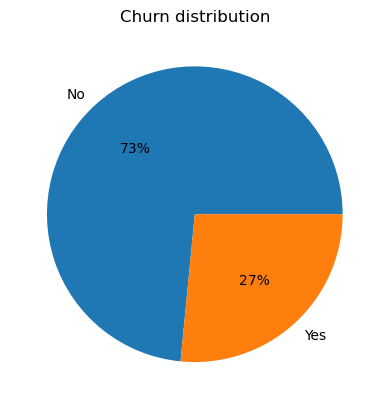

In [26]:
val_cnts = df['Churn'].value_counts()
plt.pie(val_cnts.values,labels = val_cnts.index,autopct='%.0f%%')
plt.title('Churn distribution')
plt.show()

In [28]:
cat_columns = df.select_dtypes(['object']).columns

In [30]:
for i in cat_columns[1:]:
    print(df[i].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
StreamingTV
No                     2810
Y

## Convert the Total Charges Columns into numeric values 
### before drop the empty string values in the total charges .

In [32]:
df[df['TotalCharges']==" "].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

## Only Less No of Columns we can drop that values in column

In [33]:
df.drop(df[df['TotalCharges']==" "].index,axis=0,inplace=True)

In [50]:
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [35]:
cat_columns = df.select_dtypes(['object']).columns

In [36]:
print(len(cat_columns))

17


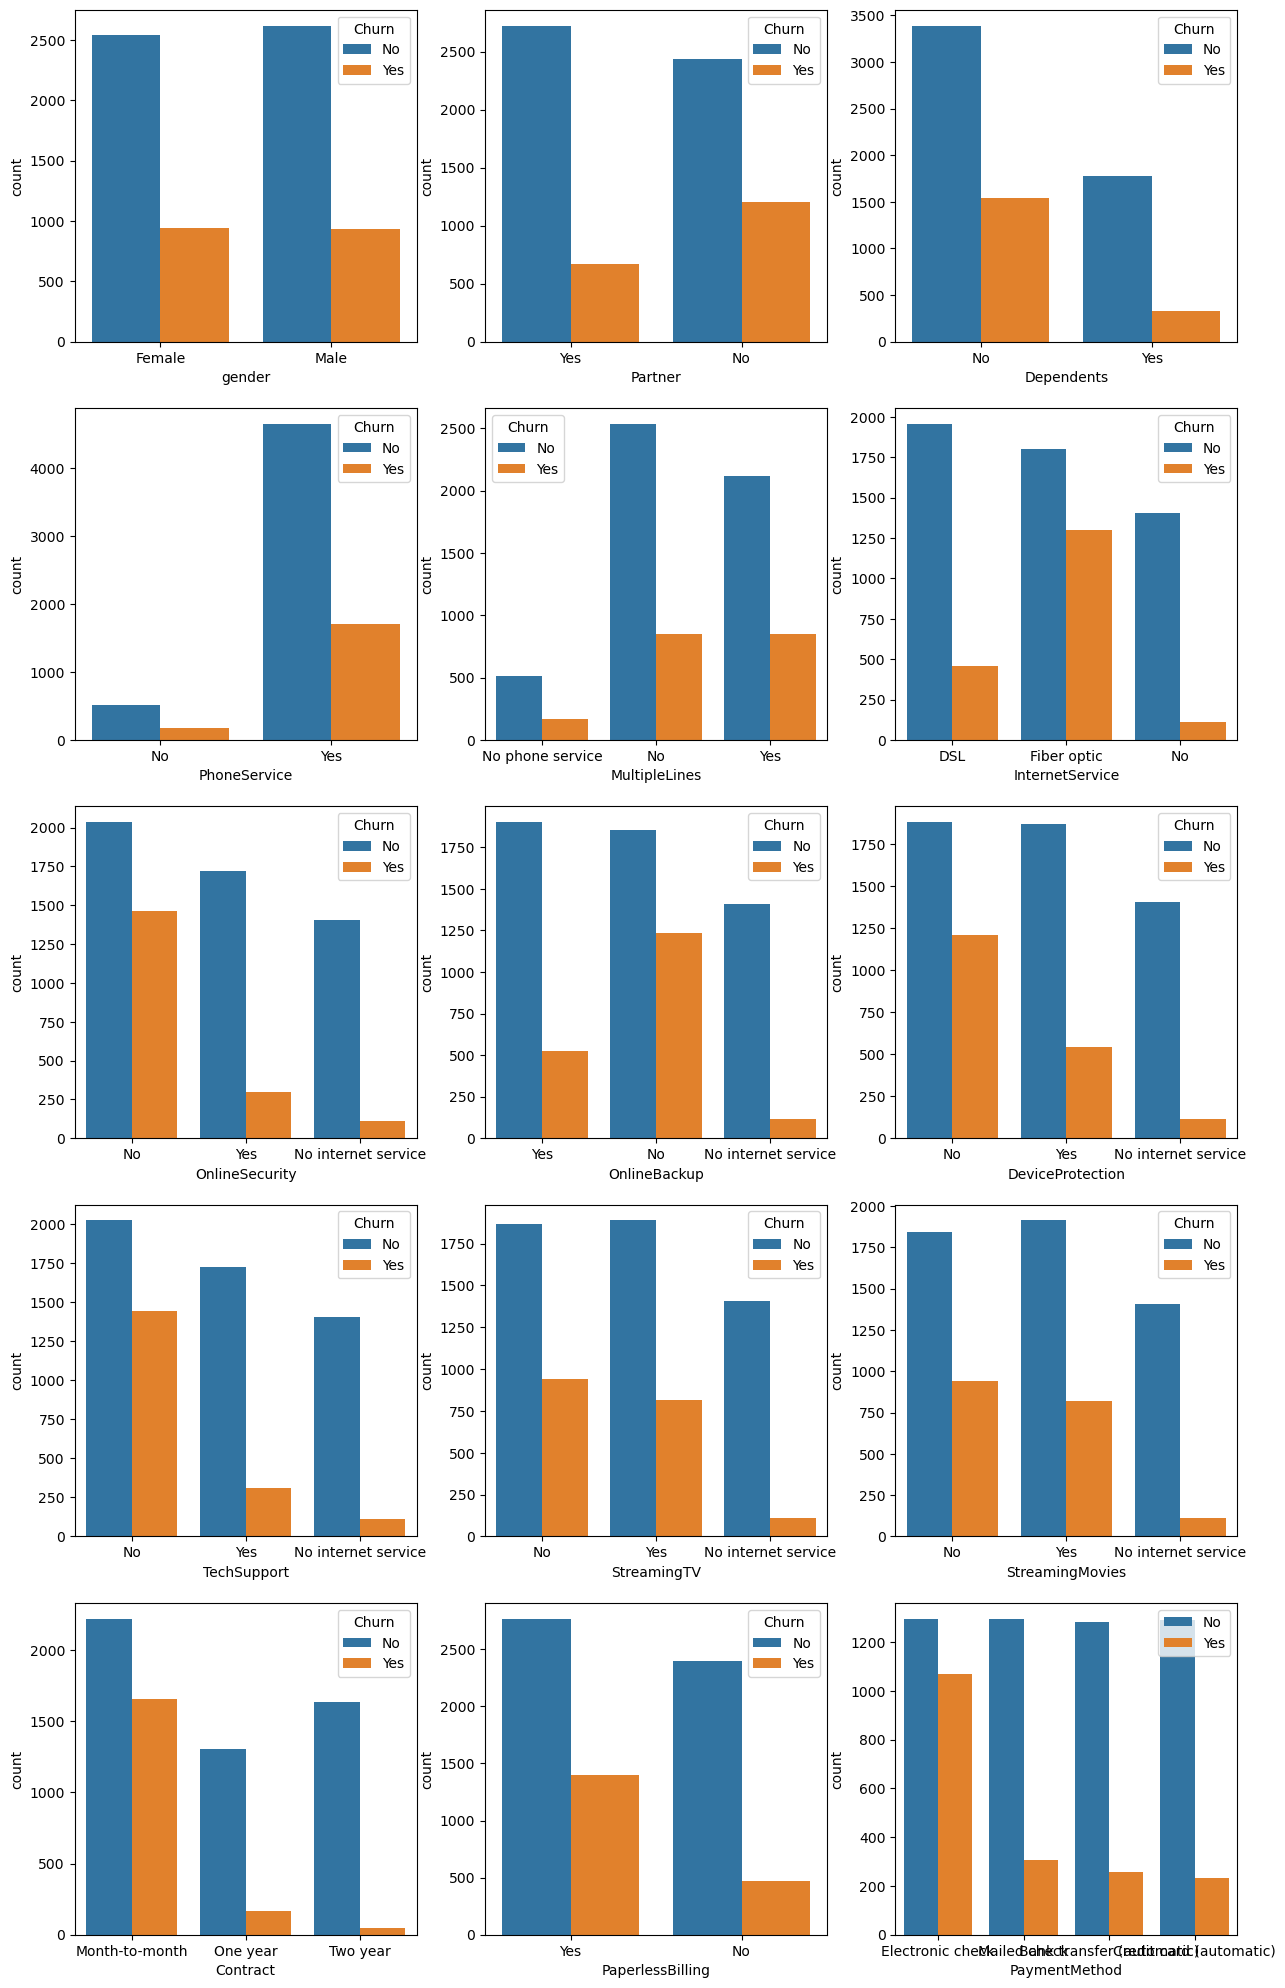

In [45]:
fig,axes = plt.subplots(5,3,figsize=(15,25))
axes = axes.flatten()
for ax,i in zip(axes,cat_columns[1:-1]):
    sns.countplot(data=df,x=i,hue=cat_columns[-1],ax=ax)
plt.legend()
plt.show()

In [51]:
num_columns = df.select_dtypes(['float','int']).columns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


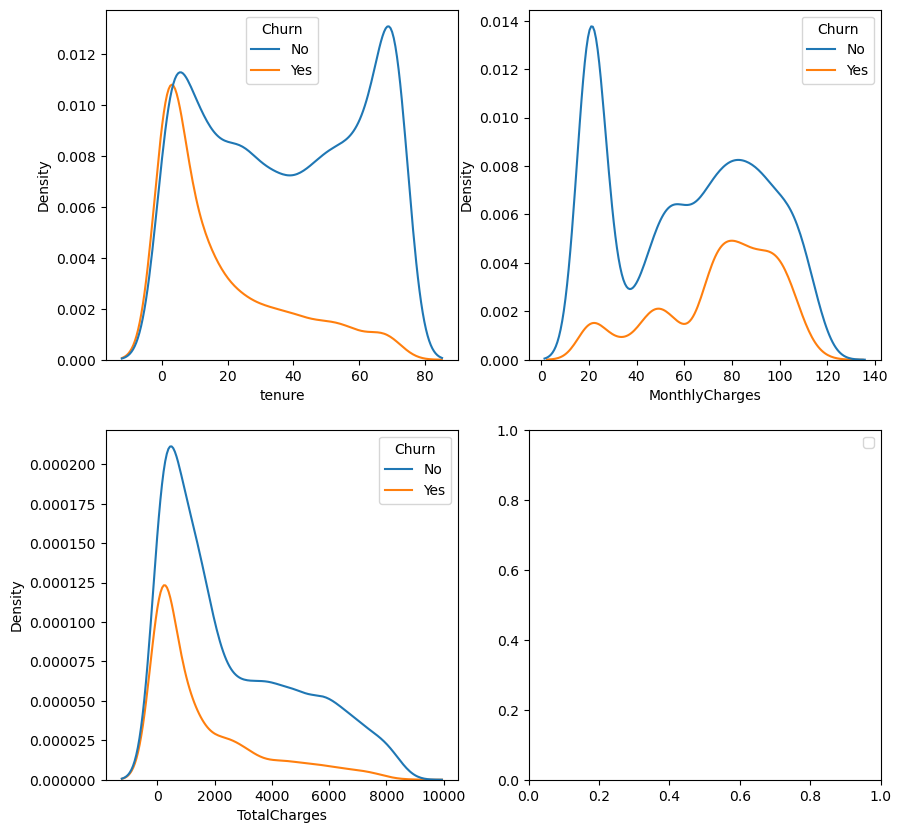

In [57]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
axes = ax.flatten()
# axes = axes[:-1
for i,ax in zip(num_columns,axes):
    sns.kdeplot(data=df,x=i,ax=ax,hue=cat_columns[-1])
plt.legend()
plt.show()

In [6]:
df.head().T
df.iloc[:,-1] = LabelEncoder().fit_transform(df.iloc[:,-1])

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [60]:
df.to_csv('artifacts/customer_churn.csv',index=False)

In [7]:
for i in df.columns[1:-1]:
    print(df[i].value_counts())

gender
Male      3549
Female    3483
Name: count, dtype: int64
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64
Partner
No     3639
Yes    3393
Name: count, dtype: int64
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64
DeviceProtection
No                     3094
Yes                    2418
No

In [8]:
print(len(df.columns[1:-1]))

19


In [8]:
for i  in df.columns[1:-1]:
    print(i)

gender
seniorcitizen
partner
dependents
tenure
phoneservice
multiplelines
internetservice
onlinesecurity
onlinebackup
deviceprotection
techsupport
streamingtv
streamingmovies
contract
paperlessbilling
paymentmethod
monthlycharges
totalcharges


In [7]:
df.columns = [i.lower().strip() for i in df.columns]

In [9]:
for i in df.columns:
    print(df[i].value_counts())

customerid
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: count, Length: 7032, dtype: int64
gender
Male      3549
Female    3483
Name: count, dtype: int64
seniorcitizen
0    5890
1    1142
Name: count, dtype: int64
partner
No     3639
Yes    3393
Name: count, dtype: int64
dependents
No     4933
Yes    2099
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64
phoneservice
Yes    6352
No      680
Name: count, dtype: int64
multiplelines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
internetservice
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
onlinesecurity
No                     3497
Yes                    2015
No internet service    15

In [10]:
df.iloc[:,1:-1] = df.iloc[:,1:-1].apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

In [11]:
for i in df.columns:
    print(df[i].value_counts())

customerid
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: count, Length: 7032, dtype: int64
gender
male      3549
female    3483
Name: count, dtype: int64
seniorcitizen
0    5890
1    1142
Name: count, dtype: int64
partner
no     3639
yes    3393
Name: count, dtype: int64
dependents
no     4933
yes    2099
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64
phoneservice
yes    6352
no      680
Name: count, dtype: int64
multiplelines
no                  3385
yes                 2967
no phone service     680
Name: count, dtype: int64
internetservice
fiber optic    3096
dsl            2416
no             1520
Name: count, dtype: int64
onlinesecurity
no                     3497
yes                    2015
no internet service    15